# Data Collection Phase 

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. more the data better the model 

In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites. 

Basically, we need these columns-
1. reviews of the product. 
2. rating of the product. 

You can fetch other data as well, if you think data can be useful or can help in the project. It completely depends on your imagination or assumption. 

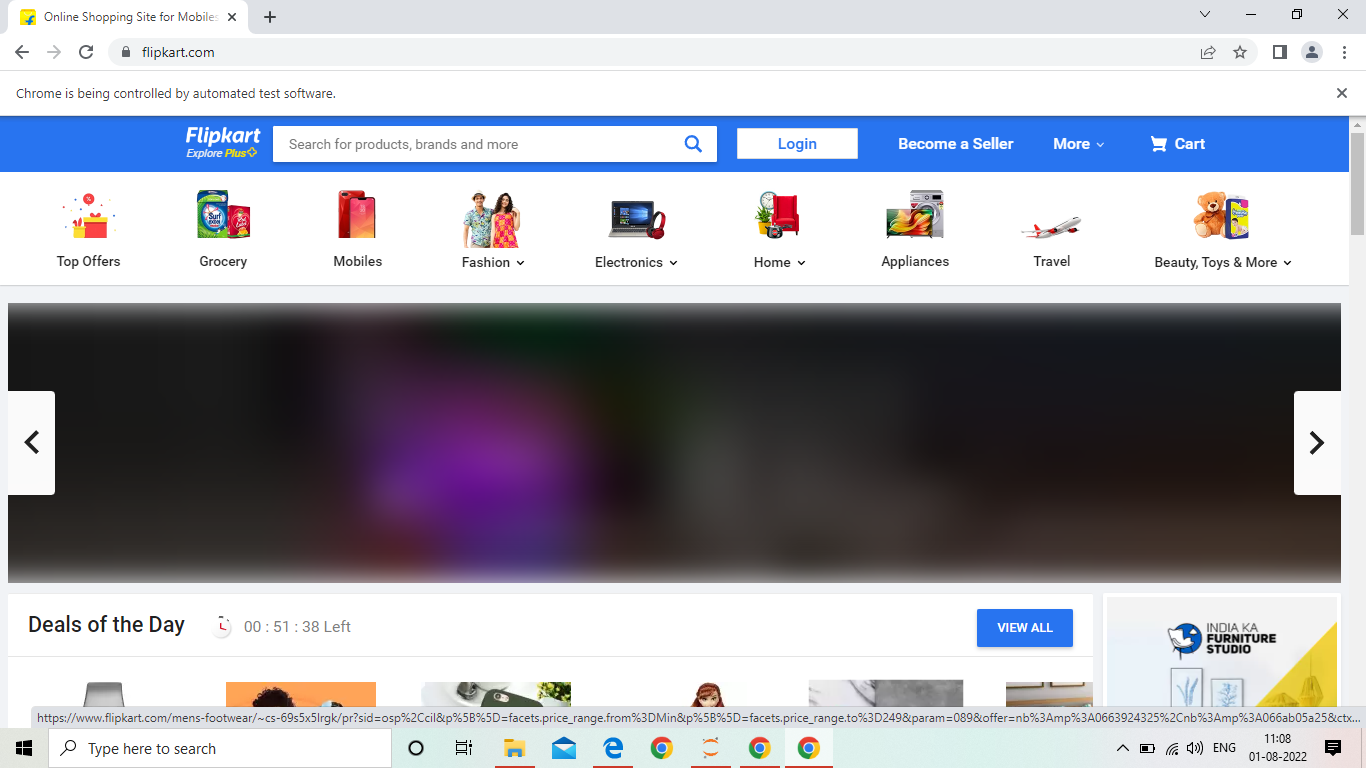

### Hint: 

- Try to fetch data from different websites. If data is from different websites, it will help our model to remove the effect of over fitting. 
- Try to fetch an equal number of reviews for each rating, for example if you are fetching 10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set. 
- Convert all the ratings to their round number, as there are only 5 options for rating i.e., 1,2,3,4,5. If a rating is 4.5 convert it 5. 

### Importing libraries require for scraping

In [52]:
#import all needed libraries
import pandas as pd
import selenium
from selenium import webdriver
import time
import requests
from bs4 import BeautifulSoup
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')

## Scrap Data From Flipkart

In [61]:
driver=webdriver.Chrome(r'C:\Users\dell\Downloads\chromedriver_win32 (2)\chromedriver.exe')
url='https://www.flipkart.com/'
driver.get(url)
time.sleep(5)

In [62]:
#click the cancel button
driver.find_element_by_xpath('//div[@class="_2QfC02"]/button').click()

In [70]:
#Collected Items
items=['Laptops','Phones','Smart Watches','Monitors','Headphones','Cameras','Printers','Home Theater']
title = []
review_text = []
ratings = []

In [56]:
def scrap():
    titles=driver.find_elements_by_xpath('//p[@class="_2-N8zT"]')
    for i in titles:
        title.append(i.text)
    reviews=driver.find_elements_by_xpath('//div[@class="t-ZTKy"]')
    for i in reviews:
        review_text.append(i.text)
    rate=driver.find_elements_by_xpath('//p[@class="_2-N8zT"]/../div')
    for i in rate:
        ratings.append(i.text)
    return

In [ ]:
urls=[]
for i in items:
    #select the search bar
    srch_bar=driver.find_element_by_xpath('//div[@class="_3OO5Xc"]/input')
    #clear the search bar
    srch_bar.clear()
    #Pass the item name to search bar
    srch_bar.send_keys(i)
    #click the search button
    driver.find_element_by_xpath('//button[@class="L0Z3Pu"]').click()
    
    page=[]
    for i in driver.find_elements_by_xpath('//nav[@class="yFHi8N"]/a'):
        page.append(i.get_attribute('href'))
    for i in page[0:4]:
        driver.get(i)
        time.sleep(3)
        for x in driver.find_elements_by_xpath('//a[@class="_1fQZEK"]'):
            urls.append(x.get_attribute('href'))
            time.sleep(3)
len(urls)

In [97]:
for i in urls:
    driver.get(i)
    time.sleep(3)
    for _ in range(2):
        driver.execute_script('window.scrollBy(0,6000)')
        time.sleep(3)
    #clicking on all reviews
    try:
        btn=driver.find_element_by_xpath('//div[@class="_2c2kV-"]following::a')
        lnk=btn.get_attribute('href')
        driver.get(lnk)
        time.sleep(3)
    except NoSuchElementException:
        pass
    
    scrap()
    try:
        np=[]
        n_page=driver.find_elements_by_xpath('//nav[@class="yFHi8N"]/a')
        for i in n_page:
            np.append(i.get_attribute('href'))
            time.sleep(3)
        for i in np[0:20]:
            driver.get(i)
            time.sleep(3)
            scrap()
    except: continue
#print length of all reviews,review titles,ratings
print(len(ratings),len(title),len(review_text))

5673 5673 5673


In [90]:
print(len(ratings),len(title),len(review_text))

5673 5673 5673


In [87]:
df=pd.DataFrame()
df['Review Title']=title
df['Review Text']=review_text
df['Rating']=ratings
df.head()

,Review Title,Review Text,Rating
0,Super!,This is a good laptop and it's charging speed ...,5
1,Really Nice,Cons.\n1.Lite or Dim display colour in 1080p r...,4
2,Great product,Good,5
3,,,
4,,,


In [88]:
df.to_csv('ratings.csv')